***PART 1: DATASET EXPLORATION***

**1. Importing required libraries**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Importing the provided dataset from my data.world into a dataframe**



In [63]:
df = pd.read_csv('https://query.data.world/s/mdelhcbll7ka77gturazrjwy3lxrvn?dws=00000')

**3. Reviewing the data**

In [64]:
# checking dataframe shape
df.shape

(1586614, 13)

In [65]:
# printing first 10 rows to see the content of the file
df.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [66]:
# checking the column headers
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [67]:
# checking if we have nulls values in any of the columns
df.isnull().sum()

,0
brewery_id,0
brewery_name,15
review_time,0
review_overall,0
review_aroma,0
review_appearance,0
review_profilename,348
beer_style,0
review_palate,0
review_taste,0


In [68]:
#checing percentage of non-null values
df.count()/len(df)

,0
brewery_id,1.000000
brewery_name,0.999991
review_time,1.000000
review_overall,1.000000
review_aroma,1.000000
review_appearance,1.000000
review_profilename,0.999781
beer_style,1.000000
review_palate,1.000000
review_taste,1.000000


***PART 2: ANSWERING THE QUESTIONS***

**QUESTION 1: Which brewery produces the strongest beers by abv?**








In [69]:
# grouping the reviews by beer ids and filtering the columns
df_str = df[['brewery_name','beer_beerid','beer_name','beer_abv']].groupby('beer_beerid').agg(beer_abv=('beer_abv','mean'), brewery_name=('brewery_name', 'first'), beer_name =('beer_name','first'))

In [70]:
# defining a function to calculate coefficient of variation
def cv(series):
    return series.std() / series.mean()

In [71]:
# preparing a df with needed statistics per brewery
df_str_sta = df_str.groupby('brewery_name').agg(
    mean_abv=('beer_abv', 'mean'),
    median_abv=('beer_abv', 'median'),
    count_beers=('beer_abv', 'count'),
    std_abv=('beer_abv', 'std'),
    cv_abv=('beer_abv', cv)  # Apply custom CV function
).sort_values('mean_abv', ascending=False)


In [72]:
# prining the results - sorted df with breweries producing the strongest beers
df_str_sta[df_str_sta['count_beers'] > 0].head(20)

,mean_abv,median_abv,count_beers,std_abv,cv_abv
brewery_name,,,,,
Schorschbräu,24.690000,16.00,10,17.104880,0.692786
Shoes Brewery,15.200000,15.20,1,NaN,NaN
Rome Brewing Company,14.200000,14.20,2,2.545584,0.179267
Hurlimann Brewery,13.500000,14.00,3,0.866025,0.064150
Alt-Oberurseler Brauhaus,13.200000,13.20,1,NaN,NaN
Rascal Creek Brewing Co.,13.000000,13.00,1,NaN,NaN
Monks Porter House,12.466667,11.00,3,3.165965,0.253954
United Brands Company,12.000000,12.00,1,NaN,NaN
Morgan Street Brewery,12.000000,12.00,1,NaN,NaN


In [73]:
# checking which brewery produces the strongest beer of them all
df_str.sort_values('beer_abv', ascending = False).head(20)

,beer_abv,brewery_name,beer_name
beer_beerid,,,
73368,57.70,Schorschbräu,Schorschbräu Schorschbock 57%
57856,43.00,Schorschbräu,Schorschbräu Schorschbock 43%
57015,41.00,BrewDog,Sink The Bismarck!
55712,39.44,Schorschbräu,Schorschbräu Schorschbock 40%
70633,39.00,De Struise Brouwers,Black Damnation VI - Messy
54571,32.00,BrewDog,Tactical Nuclear Penguin
51466,30.86,Schorschbräu,Schorschbräu Schorschbock 31%
35197,29.00,Hair of the Dog Brewing Company / Brewery and ...,Dave
74021,28.00,BrewDog,Ghost Deer


**ANSWER:** Taking into consideration mean values of beer strenght (as beer_abv) for all beers produced in the given brewery, according to the dataset, the strongest beers are produced in brewery **Schorschbräu**. This brewery also produces the strongest beers included in the dataset:


*   Schorschbräu Schorschbock 57%, and
*   Schorschbräu Schorschbock 43%



**QUESTION 2: If you had to pick 3 beers to recommend to someone, how would you approach the problem?**

If I had to pick 3 beers to recommend to someone, I would review the data to find:

*   popular beers which have many reviews,
*   beers with the best possible ratings in parameters that are important to me,
*   beers that are not strong.


To be precise, the exact conditions would be:
*   Above 1000 reviews
*   Mean review_overall = 5
*   Mean review_taste = 5
*   Mean review_aroma = 5
*   Beer_abv < 4.5

In [74]:
# preparing dataframe with list of beers, and columns needed for further analysis
df_rec = df.groupby('beer_beerid').agg(
    beer_name=('beer_name', 'first'),
    brewery_name=('brewery_name', 'first'),
    count_reviews=('review_time', 'count'),
    review_overall=('review_overall', 'mean'),
    review_taste=('review_taste', 'mean'),
    review_aroma=('review_aroma', 'mean'),
    beer_abv = ('beer_abv', 'mean')
).sort_values('count_reviews', ascending=False)

In [75]:
# preparing the conditions that beer would need to meet:
condition1 = df_rec['count_reviews'] > 1000
condition2 = df_rec['review_overall'] = 5
condition3 = df_rec['review_taste'] = 5
condition4 = df_rec['review_aroma'] = 5
condition5 = df_rec['beer_abv'] < 4.5

In [76]:
# filtering the dataframe based on above conditions
df_rec[condition1 & condition2 & condition3 & condition4 & condition5].head(20)

,beer_name,brewery_name,count_reviews,review_overall,review_taste,review_aroma,beer_abv
beer_beerid,,,,,,,
754,Guinness Draught,Guinness Ltd.,2210,5,5,5,4.20
1351,Yuengling Traditional Lager,Yuengling Brewery,1517,5,5,5,4.40
1320,Bud Light,Anheuser-Busch,1302,5,5,5,4.20
429,Pilsner Urquell,"Plzensky Prazdroj, a. s.",1257,5,5,5,4.40
837,Coors Light,Coors Brewing Company,1157,5,5,5,4.20
332,Miller Lite,Miller Brewing Co.,1082,5,5,5,4.17
6301,Stone Levitation Ale,Stone Brewing Co.,1017,5,5,5,4.40


**ANSWER:** In order to pick 3 beers to recommend to someone, I have identified the beers that:

*   are popular (have many reviews),
*   provide best value for parameters that are important for me (overall review, taste and aroma),
*   are weakest possible.

Based on the results, there is a list of beers all rated:


*   5 overall
*   5 for taste
*   5 for aroma
*   with strength below 4.5

I would choose the beers with higest amount of reviews, as it means the higest number of people agreed on their qualities, making them a safe recommendation.

The recommended beers would be:


*   Guinness Draught
*   Yuengling Traditional Lager
*   Bud Light




**QUESTION 3: What are the factors that impacts the quality of beer the most?**




In [77]:
# preparing dataframe with list of beers and potential factors that impact the beer quality
df_fac = df.groupby('beer_beerid').agg(
    beer_name=('beer_name', 'first'),
    brewery_name=('brewery_name', 'first'),
    count_reviews=('review_time', 'count'),
    review_overall=('review_overall', 'mean'),
    review_taste=('review_taste', 'mean'),
    review_aroma=('review_aroma', 'mean'),
    review_appearance=('review_appearance','mean'),
    review_palate=('review_palate', 'mean'),
    beer_abv = ('beer_abv', 'mean')
).dropna().sort_values('count_reviews', ascending=False)

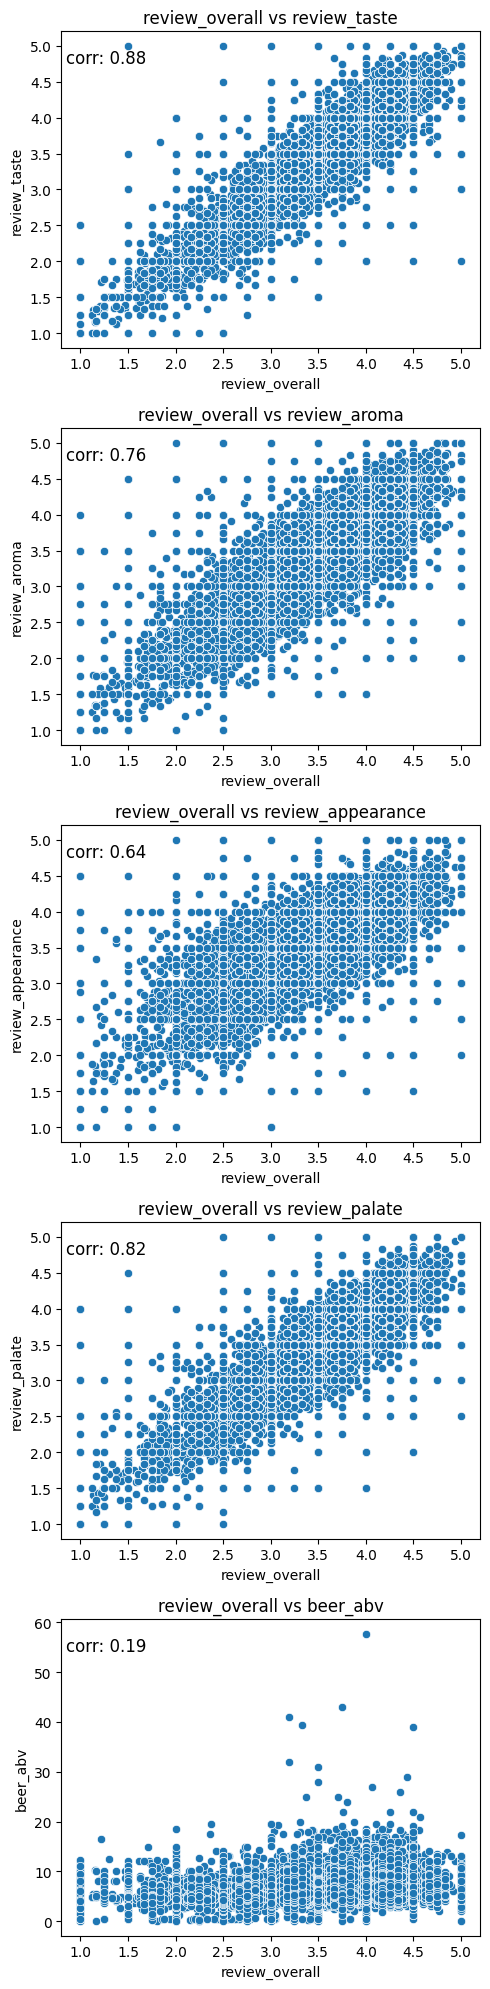

In [78]:
#checking if there are any correlations between parameters
variables = ['review_taste', 'review_aroma', 'review_appearance', 'review_palate', 'beer_abv']
n_vars = len(variables)

# creating subplots
fig, axes = plt.subplots(n_vars, 1, figsize = (5,20))

# looping through each variable and create a scatter plot
for i, var in enumerate(variables):
    corr = df_fac['review_overall'].corr(df_fac[var])
    sns.scatterplot(data=df_fac, x='review_overall', y=var, ax=axes[i])
    axes[i].annotate(f'corr: {corr:.2f}', xy=(0.01, 0.9), fontsize=12, xycoords='axes fraction')
    axes[i].set_title(f'review_overall vs {var}')


plt.tight_layout()
plt.show()

In [79]:
df_fac[['review_taste', 'review_aroma', 'review_appearance', 'review_palate', 'beer_abv']].corrwith(df_fac['review_overall']).sort_values(ascending = False)

,0
review_taste,0.879087
review_palate,0.818576
review_aroma,0.760654
review_appearance,0.638697
beer_abv,0.192208


**ANSWER:** Based on the correlation between overall reviews and other parameters, we see that there are a few factors affecting the overall perception of a beer:

*   taste and palate have the highest impact, with very strong correlation
*   aroma and appearance also show strong correlation
*   and  there is no or very week correlation with the beer strength, which means, that the parameter beer_abv doesn't impart the overall perception of the beer.

To sum up, all 4 factors (taste, palate, aroma and appearance) greatly affect the overall perception of the beer, but the 3 factors, that affect it the most are (in order):


*   taste,
*   palate and
*   aroma.



**QUESTION 4: I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy?**

In [80]:
# preparing a dataframe with list of beers and other needed columns
df_sty = df.groupby('beer_beerid').agg(
    beer_name=('beer_name', 'first'),
    brewery_name=('brewery_name', 'first'),
    beer_style=('beer_style', 'first'),
    review_aroma=('review_overall', 'mean'),
    review_appearance=('review_appearance','mean'),
).dropna()

In [81]:
# calculating the average aroma and appearance per beer style
df_styles = df[['beer_style', 'review_aroma', 'review_appearance']].groupby('beer_style').agg(
    review_aroma=('review_aroma', 'mean'),
    review_appearance=('review_appearance','mean'),
    beer_count=('beer_style', 'count')).dropna()

In [82]:
# adding average values to the list of beers
df_joined = df_sty.join(df_styles, how='left', on = 'beer_style', rsuffix = '_mean')

In [83]:
# calculating the difference between mean parameter per beer_style and given beer on the list for aroma and appearance
df_joined['aroma_diff'] = abs(df_joined['review_aroma_mean'] - df_joined['review_aroma'])
df_joined['appearance_diff'] = abs(df_joined['review_appearance_mean'] - df_joined['review_appearance'])

# summing the difference
df_joined['aroma_appearance_diff'] = df_joined['aroma_diff'] + df_joined['appearance_diff']

# sorting the df to see the beers for which the difference from the mean is the smallest
df_joined.sort_values('aroma_appearance_diff').head(20)

,beer_name,brewery_name,beer_style,review_aroma,review_appearance,review_aroma_mean,review_appearance_mean,beer_count,aroma_diff,appearance_diff,aroma_appearance_diff
beer_beerid,,,,,,,,,,,
32780,Aiko,Rinkuškiai Alaus Darykloje,Euro Strong Lager,2.875000,3.229167,2.872430,3.229442,2724,0.002570,0.000275,0.002845
1860,Whitbread Pale Ale,Whitbread PLC,English Pale Ale,3.422925,3.693676,3.420626,3.695881,23402,0.002298,0.002205,0.004503
59978,Public Domaine + 10,Two Brothers Brewing Company,American Wild Ale,4.125000,4.000000,4.126756,4.005451,17794,0.001756,0.005451,0.007207
64043,Dubbel,Rockmill Brewery,Dubbel,3.909091,4.000000,3.900390,4.000000,19983,0.008701,0.000000,0.008701
17548,XS Ale,Lagunitas Brewing Company,American Strong Ale,3.980769,4.019231,3.979574,4.026749,31945,0.001195,0.007518,0.008713
58277,Bourbon Barrel 12th Anniversary Bitter Chocola...,Stone Brewing Co.,American Double / Imperial Stout,4.166667,4.166667,4.160665,4.163633,50705,0.006002,0.003034,0.009036
926,Theakston Old Peculier,T & R Theakston Ltd.,Old Ale,4.005525,3.934622,4.007277,3.941985,14703,0.001753,0.007362,0.009115
14507,India Pale Ale,Nøgne Ø - Det Kompromissløse Bryggeri A/S,American IPA,3.891089,3.975248,3.894103,3.968525,117586,0.003014,0.006722,0.009736
48110,Belgian Red Ale,Rock Bottom Restaurant & Brewery,Belgian Pale Ale,3.750000,3.875000,3.743412,3.871629,19354,0.006588,0.003371,0.009959


**ANSWER:** Based on the difference of aroma and appearance from the mean values per beer style, the beer that best matches its style is **Aiko	from Rinkuškiai Alaus Darykloje brewery.** If you're into Euro Strong Lager beer styles, that's the beer you definetly should buy.   